In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [2]:
#for filename
m_name=''
m_set=''

In [3]:
#1. Dataset with sentiment score
#2. Dataset without sentiment score(Only stock dataset)
dt_choice = input("Enter the dataset: ")

Enter the dataset: 1


In [4]:
if(dt_choice == 1):
    df = read_csv('news_score_final.csv', header=0, index_col=0)
    dataset = df[['LTP','Open','High','Low','Quantity','Score']]
    n_features = 6
    m_set = 'All' #for filename
else:
    df = read_csv('news_score_final.csv', header=0, index_col=0)
    dataset = df[['LTP','Open','High','Low','Quantity']]
    n_features = 5
    m_set = 'Only'

In [5]:
#1 LSTM 
#2 GRU
model_name = input("Enter the of the module(1/2): ")

Enter the of the module(1/2): 1


In [6]:
dataset=dataset.reset_index()
dataset.head(2)

,Date,LTP,Open,High,Low,Quantity
0,12/6/2010,289.469482,290.575562,291.291290,288.593597,4183400
1,12/7/2010,293.863861,295.930939,296.796783,293.293304,6078300


In [7]:
dataset['Date']=pd.to_datetime(dataset.Date)
dataset.set_index('Date',drop=True,inplace=True)
dataset.shape

(1990, 5)

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


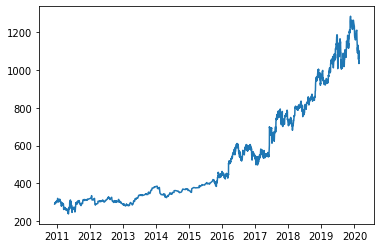

In [8]:
plt.plot(dataset['LTP'])

In [9]:
dataset=dataset.sort_index()
dataset.head()

,LTP,Open,High,Low,Quantity
Date,,,,,
2010-12-06,289.469482,290.575562,291.291290,288.593597,4183400
2010-12-07,293.863861,295.930939,296.796783,293.293304,6078300
2010-12-08,295.565552,296.281281,296.556549,292.137146,3510200
2010-12-09,296.046051,297.237244,298.088074,294.794800,3734000
2010-12-10,296.401398,296.866852,297.292297,295.440430,3405900


In [10]:
from pandas import DataFrame
from pandas import concat
import pandas as pd

In [11]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [12]:
data=series_to_supervised(dataset, 12,1)

In [13]:
dataset.head()

,LTP,Open,High,Low,Quantity
Date,,,,,
2010-12-06,289.469482,290.575562,291.291290,288.593597,4183400
2010-12-07,293.863861,295.930939,296.796783,293.293304,6078300
2010-12-08,295.565552,296.281281,296.556549,292.137146,3510200
2010-12-09,296.046051,297.237244,298.088074,294.794800,3734000
2010-12-10,296.401398,296.866852,297.292297,295.440430,3405900


In [14]:
data.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-18,289.469482,290.575562,291.291290,288.593597,4183400.0,293.863861,295.930939,296.796783,293.293304,6078300.0,...,301.836823,299.584595,302.662659,299.104095,3755200.0,303.048035,302.302307,303.803802,301.941956,2412500
2010-12-20,293.863861,295.930939,296.796783,293.293304,6078300.0,295.565552,296.281281,296.556549,292.137146,3510200.0,...,303.048035,302.302307,303.803802,301.941956,2412500.0,302.417419,302.972961,303.303314,301.316315,2219300
2010-12-21,295.565552,296.281281,296.556549,292.137146,3510200.0,296.046051,297.237244,298.088074,294.794800,3734000.0,...,302.417419,302.972961,303.303314,301.316315,2219300.0,301.491486,301.671661,302.192200,300.050049,2413700
2010-12-22,296.046051,297.237244,298.088074,294.794800,3734000.0,296.401398,296.866852,297.292297,295.440430,3405900.0,...,301.491486,301.671661,302.192200,300.050049,2413700.0,299.759766,301.326324,302.237244,299.304291,2127400
2010-12-23,296.401398,296.866852,297.292297,295.440430,3405900.0,297.607605,298.858856,301.801788,297.342346,4792200.0,...,299.759766,301.326324,302.237244,299.304291,2127400.0,300.800812,301.301300,301.506500,299.759766,2036300


In [15]:
values = dataset.values
values = values.astype('float32')

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [17]:
# specify the number of lag hours
n_lag = 12


In [18]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, 1)
print(reframed.shape)

(1978, 65)


In [19]:
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
12,0.049428,0.050707,0.048225,0.050521,0.133006,0.053622,0.055799,0.053464,0.055100,0.201814,...,0.061231,0.059272,0.059046,0.060762,0.117457,0.062387,0.061856,0.060132,0.063527,0.068700
13,0.053622,0.055799,0.053464,0.055100,0.201814,0.055246,0.056132,0.053235,0.053973,0.108560,...,0.062387,0.061856,0.060132,0.063527,0.068700,0.061785,0.062493,0.059656,0.062918,0.061684
14,0.055246,0.056132,0.053235,0.053973,0.108560,0.055704,0.057041,0.054693,0.056563,0.116687,...,0.061785,0.062493,0.059656,0.062918,0.061684,0.060901,0.061256,0.058598,0.061684,0.068743
15,0.055704,0.057041,0.054693,0.056563,0.116687,0.056044,0.056688,0.053935,0.057192,0.104773,...,0.060901,0.061256,0.058598,0.061684,0.068743,0.059249,0.060928,0.058641,0.060957,0.058347
16,0.056044,0.056688,0.053935,0.057192,0.104773,0.057195,0.058582,0.058227,0.059045,0.155113,...,0.059249,0.060928,0.058641,0.060957,0.058347,0.060242,0.060904,0.057946,0.061401,0.055039


In [20]:
# split into train and test sets
values = reframed.values

In [21]:
n_train = int(365 * 4)
train = values[:n_train, :]
test = values[n_train:, :]

In [22]:
x_test_panda=dataset.iloc[n_train:,:]

In [23]:
x_test_panda.shape

(530, 5)

In [24]:
test.shape

(518, 65)

In [25]:
# split into input and outputs
n_obs = n_lag * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(1460, 60) 1460 (1460,)


In [26]:
# reshape input to be 3D [samples, timesteps, features]
train_X = np.reshape(train_X, (train_X.shape[0], n_lag, n_features))
test_X = np.reshape(test_X, (test_X.shape[0], n_lag, n_features))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1460, 12, 5) (1460,) (518, 12, 5) (518,)


In [27]:
def plot_history(history):
    #plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [29]:
def model_build(model_name):
    model = Sequential()
    if(model_name == 1):
        model.add(LSTM(120,input_shape=(train_X.shape[1], train_X.shape[2])))
        m_name = 'LSTM'
    else:
        model.add(GRU(120,input_shape=(train_X.shape[1], train_X.shape[2])))
        m_name = 'GRU'
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam',metrics=['mse','mae'])
    return model

In [30]:
def da(y_true,y_pred):
    sum=0
    for i in range(y_true.size-1):
        dt=(y_true[i+1]-y_true[i])*(y_pred[i+1]-y_true[i])
        if(dt>=0):
            sum=sum+1
    return sum/(y_true.size-1)

In [31]:
def evaluateModel(inv_y,inv_yhat):
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)
    print('R2_Score: %.3f' % r2_score(inv_y,inv_yhat))
    print("MAE:", mean_absolute_error(inv_y,inv_yhat))
    print("Directionnal Accuracyc:", da(inv_y,inv_yhat))

In [32]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.callbacks import EarlyStopping

In [34]:
model = model_build(model_name)

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
history = model.fit(train_X, train_y, epochs=100, batch_size=30, validation_data=(test_X, test_y),callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=2, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 1460 samples, validate on 518 samples
Epoch 1/100
 - 4s - loss: 6.8813e-04 - mean_squared_error: 6.8813e-04 - mean_absolute_error: 0.0203 - val_loss: 7.7542e-04 - val_mean_squared_error: 7.7542e-04 - val_mean_absolute_error: 0.0216
Epoch 2/100
 - 1s - loss: 7.5937e-04 - mean_squared_error: 7.5937e-04 - mean_absolute_error: 0.0218 - val_loss: 4.8181e-04 - val_mean_squared_error: 4.8181e-04 - val_mean_absolute_error: 0.0173
Epoch 3/100
 - 1s - loss: 6.5133e-04 - mean_squared_error: 6.5133e-04 - mean_absolute_error: 0.0198 - val_loss: 3.2358e-04 - val_mean_squared_error: 3.2358e-04 - val_mean_absolute_error: 0.0130
Epoch 4/100
 - 1s - loss: 2.5766e-04 - mean_squared_error: 2.5766e-04 - mean_absolute_error: 0.0128 - val_loss: 3.4169e-04 - val_mean_squared_error: 3.4169e-04 - val_mean_absolute_error: 0.0139
Epoch 5/100
 - 1s - loss: 1.8049e-04 - mean_squared_error: 1.8049e-04 - mean_absolute_error: 0.0104 - val_loss: 4.2939e-04 - val_

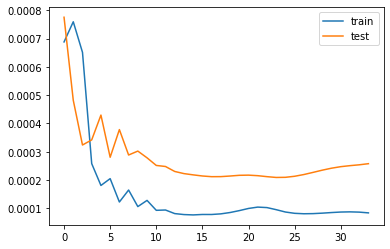

In [36]:
plot_history(history)

In [37]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_lag*n_features))

In [38]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [39]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [40]:
evaluateModel(inv_yhat,inv_y)

Test RMSE: 16.813
R2_Score: 0.982
MAE: 12.839501
Directionnal Accuracyc: 0.7117988394584139


In [41]:
def trend_error(y_true,y_pred,n):
    s=type_one=type_two=0
    for i in range(y_true.size-1):
        actual_diff=y_true[i+1]-y_true[i]
        pred_diff=y_pred[i+1]-y_true[i]
        if(actual_diff<0 and pred_diff>0):
            type_one=type_one+1
        elif(actual_diff>0 and pred_diff<0):
            type_two=type_two+1
        else:
            s=s+1
    return (s/n,type_one/n,type_two/n)

In [42]:
trend_error(inv_y,inv_yhat, inv_y.size)

(0.5135135135135135, 0.15444015444015444, 0.3301158301158301)

In [43]:
import pandas as pd
df = pd.DataFrame({'Actual':inv_y,'Predicted':inv_yhat,'Error': inv_y-inv_yhat,})

In [44]:
print(df.shape)
print(x_test_panda.shape)

(518, 3)
(530, 5)


In [45]:
y=x_test_panda.iloc[12:,]
true=y['LTP']

In [46]:
true_x=np.array(true)
pred_x=np.array(df['Actual'])

In [47]:
count=0
for i in range(true_x.size):
    if(true_x[i]==int(pred_x[i])):
        count=count+1
print(count)

9


In [48]:
output_data=df.set_index(y.index)

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C51120BBE0>,
      dtype=object)

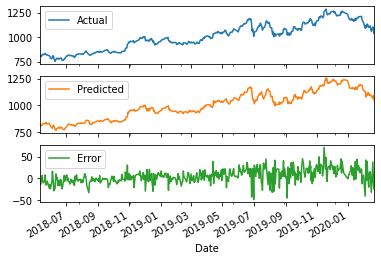

In [49]:
output_data.plot(subplots=True)

In [50]:
file_name = m_name + '_' + m_set +'_Result.csv'

In [52]:
output_data.to_csv(file_name,index=True)